# Dataset Info

Number of Instances: 205

Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

# Exploratory Analysis

In [3]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
cars.symboling.value_counts(dropna=False)

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [7]:
cars["normalized-losses"].value_counts(dropna=False)

?      41
161    11
91      8
150     7
128     6
104     6
134     6
85      5
102     5
168     5
65      5
95      5
74      5
103     5
94      5
122     4
93      4
148     4
106     4
118     4
83      3
101     3
137     3
154     3
125     3
115     3
89      2
81      2
192     2
108     2
197     2
110     2
158     2
87      2
129     2
153     2
194     2
164     2
119     2
188     2
113     2
145     2
231     1
90      1
121     1
77      1
186     1
78      1
107     1
256     1
142     1
98      1
Name: normalized-losses, dtype: int64

# Data Cleaning

In [8]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
cars = cars.replace('?', np.nan)

In [10]:
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [11]:
numeric_cars = cars[continuous_cols].copy()

In [12]:
numeric_cars = numeric_cars.astype(float)

In [13]:
numeric_cars[numeric_cars["normalized-losses"].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
9,NaN,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
14,NaN,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0,24565.0
15,NaN,103.5,189.0,66.9,55.7,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,30760.0
16,NaN,103.5,193.8,67.9,53.7,3380.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
17,NaN,110.0,197.0,70.9,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0


In [14]:
numeric_cars.isnull().sum()[numeric_cars.isnull().sum() > 0]

normalized-losses    41
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [15]:
numeric_cars.isnull().sum()[numeric_cars.isnull().sum() > 0].index.tolist()

['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

**Price** is the column that we want to predict, so all the rows with missing values for this column will be removed. For the missing values in the other columns, we will impute the mean.

In [16]:
numeric_cars = numeric_cars.dropna(subset=['price'])

In [17]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

Check columns with missing values:

In [18]:
numeric_cars.isnull().sum()[numeric_cars.isnull().sum() > 0]

Series([], dtype: int64)

As we expected, now our dataset doesn't contain any missing value for the numeric columns.

Now all the columns except the target will be normalized in a range of 0 to 1.

In [19]:
normalized_df = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
normalized_df["price"] = numeric_cars["price"]

In [20]:
normalized_df

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


# Unvariate KNN

In [145]:
plt.style.use('fivethirtyeight')

def get_bar_colors(values):
    colors = []
    for val in values:
        if val == values.min():
            colors.append('green')
        else:
            colors.append('red')
    return colors


def multiple_subplots(finale_rmses, suptitle, title, xlabel, ylabel, sigbar_x=-4.1, sigbar_y=-3):
    
    fig, ax = plt.subplots(3, 2, figsize=(30,40), sharex=True, sharey=True,)
    current_ax = 0
    for key in finale_rmses:
        pos_x = 0
        pos_y = current_ax
        if current_ax > 2:
            pos_x = 1
            pos_y = 3 - current_ax
            
            
        values = pd.Series(finale_rmses[k])
        colors = get_bar_colors(values)
        ax[pos_y][pos_x].barh(values.index, values.values, color=colors)
        current_ax += 1
        
        ax[pos_y][pos_x].set_title(title + ' (k=' + str(key) + ')', y = 1.07, weight='bold')  
                
        
        for side in ['top', 'right', 'left']:
            ax[pos_y][pos_x].spines[side].set_visible(False)
                                    
    
    plt.tick_params(axis = 'both', which = 'major', labelsize = 18)   
    fig.text(0.5, 0.04, xlabel, fontsize=24, ha='center', weight='bold')
    fig.text(-0.04, 0.5, ylabel, fontsize=24, va='center', rotation='vertical', weight='bold')
    
    fig.suptitle(suptitle, weight='bold', fontsize=28)
    
    # The signature bar
    plt.text(x = sigbar_x, y = sigbar_y,
             s = ' ©Radu Spaimoc                                                                                                                                                                                                                                                                                                                                                                                       Source: www.https://https://github.com/raduspaimoc',
             fontsize = 14,
             color = '#f0f0f0',
             backgroundcolor = '#868786')    
    
    plt.show()

def plot_horizontal_bar(series, title, xlabel, ytlabels, sigbar_x=-4.1, sigbar_y=-3):    
    fig, ax = plt.subplots(figsize=(20,10))
    
    series.sort_index().plot.barh(color='tab:blue')
    
    ax.set_title(title, y = 1.07)
    ax.set_xlabel(xlabel, fontsize=19)
    ax.set_ylabel(ytlabels, fontsize=19)
    
    plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
    #ax.set_yticklabels(ytlabels)
    
    for side in ['top', 'right', 'left']:
        ax.spines[side].set_visible(False)
    
    # Generate a bolded horizontal line at y = 0
    plt.axvline(x = 0, color = 'black', linewidth = 1.3, alpha = .7)
    
    # The signature bar
    plt.text(x = sigbar_x, y = sigbar_y,
             s = ' ©Radu Spaimoc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Source: www.https://https://github.com/raduspaimoc',
             fontsize = 14,
             color = '#f0f0f0',
             backgroundcolor = '#868786')
    plt.show() 

def knn_train_test(training_column, target_column, df, n_neighbors=5):
    
    np.random.seed(1)
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    # Fit a KNN model using default k value.
    knn.fit(train_df[[training_column]], train_df[target_column])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[training_column]])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_column], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [22]:
cols = normalized_df.columns.tolist()[:-1] 

In [23]:
k_values = [1, 3, 5, 7, 9, 11]
rmse_results = []
rmse_dic = {}
finale_rmses = {}

for k in k_values:
    for col in cols:
        result = knn_train_test(col, 'price', normalized_df, n_neighbors=k)    
        rmse_results.append(result)
        rmse_dic[col] = result
    finale_rmses[k] = rmse_dic

In [25]:
finale_rmses.keys()

dict_keys([1, 3, 5, 7, 9, 11])

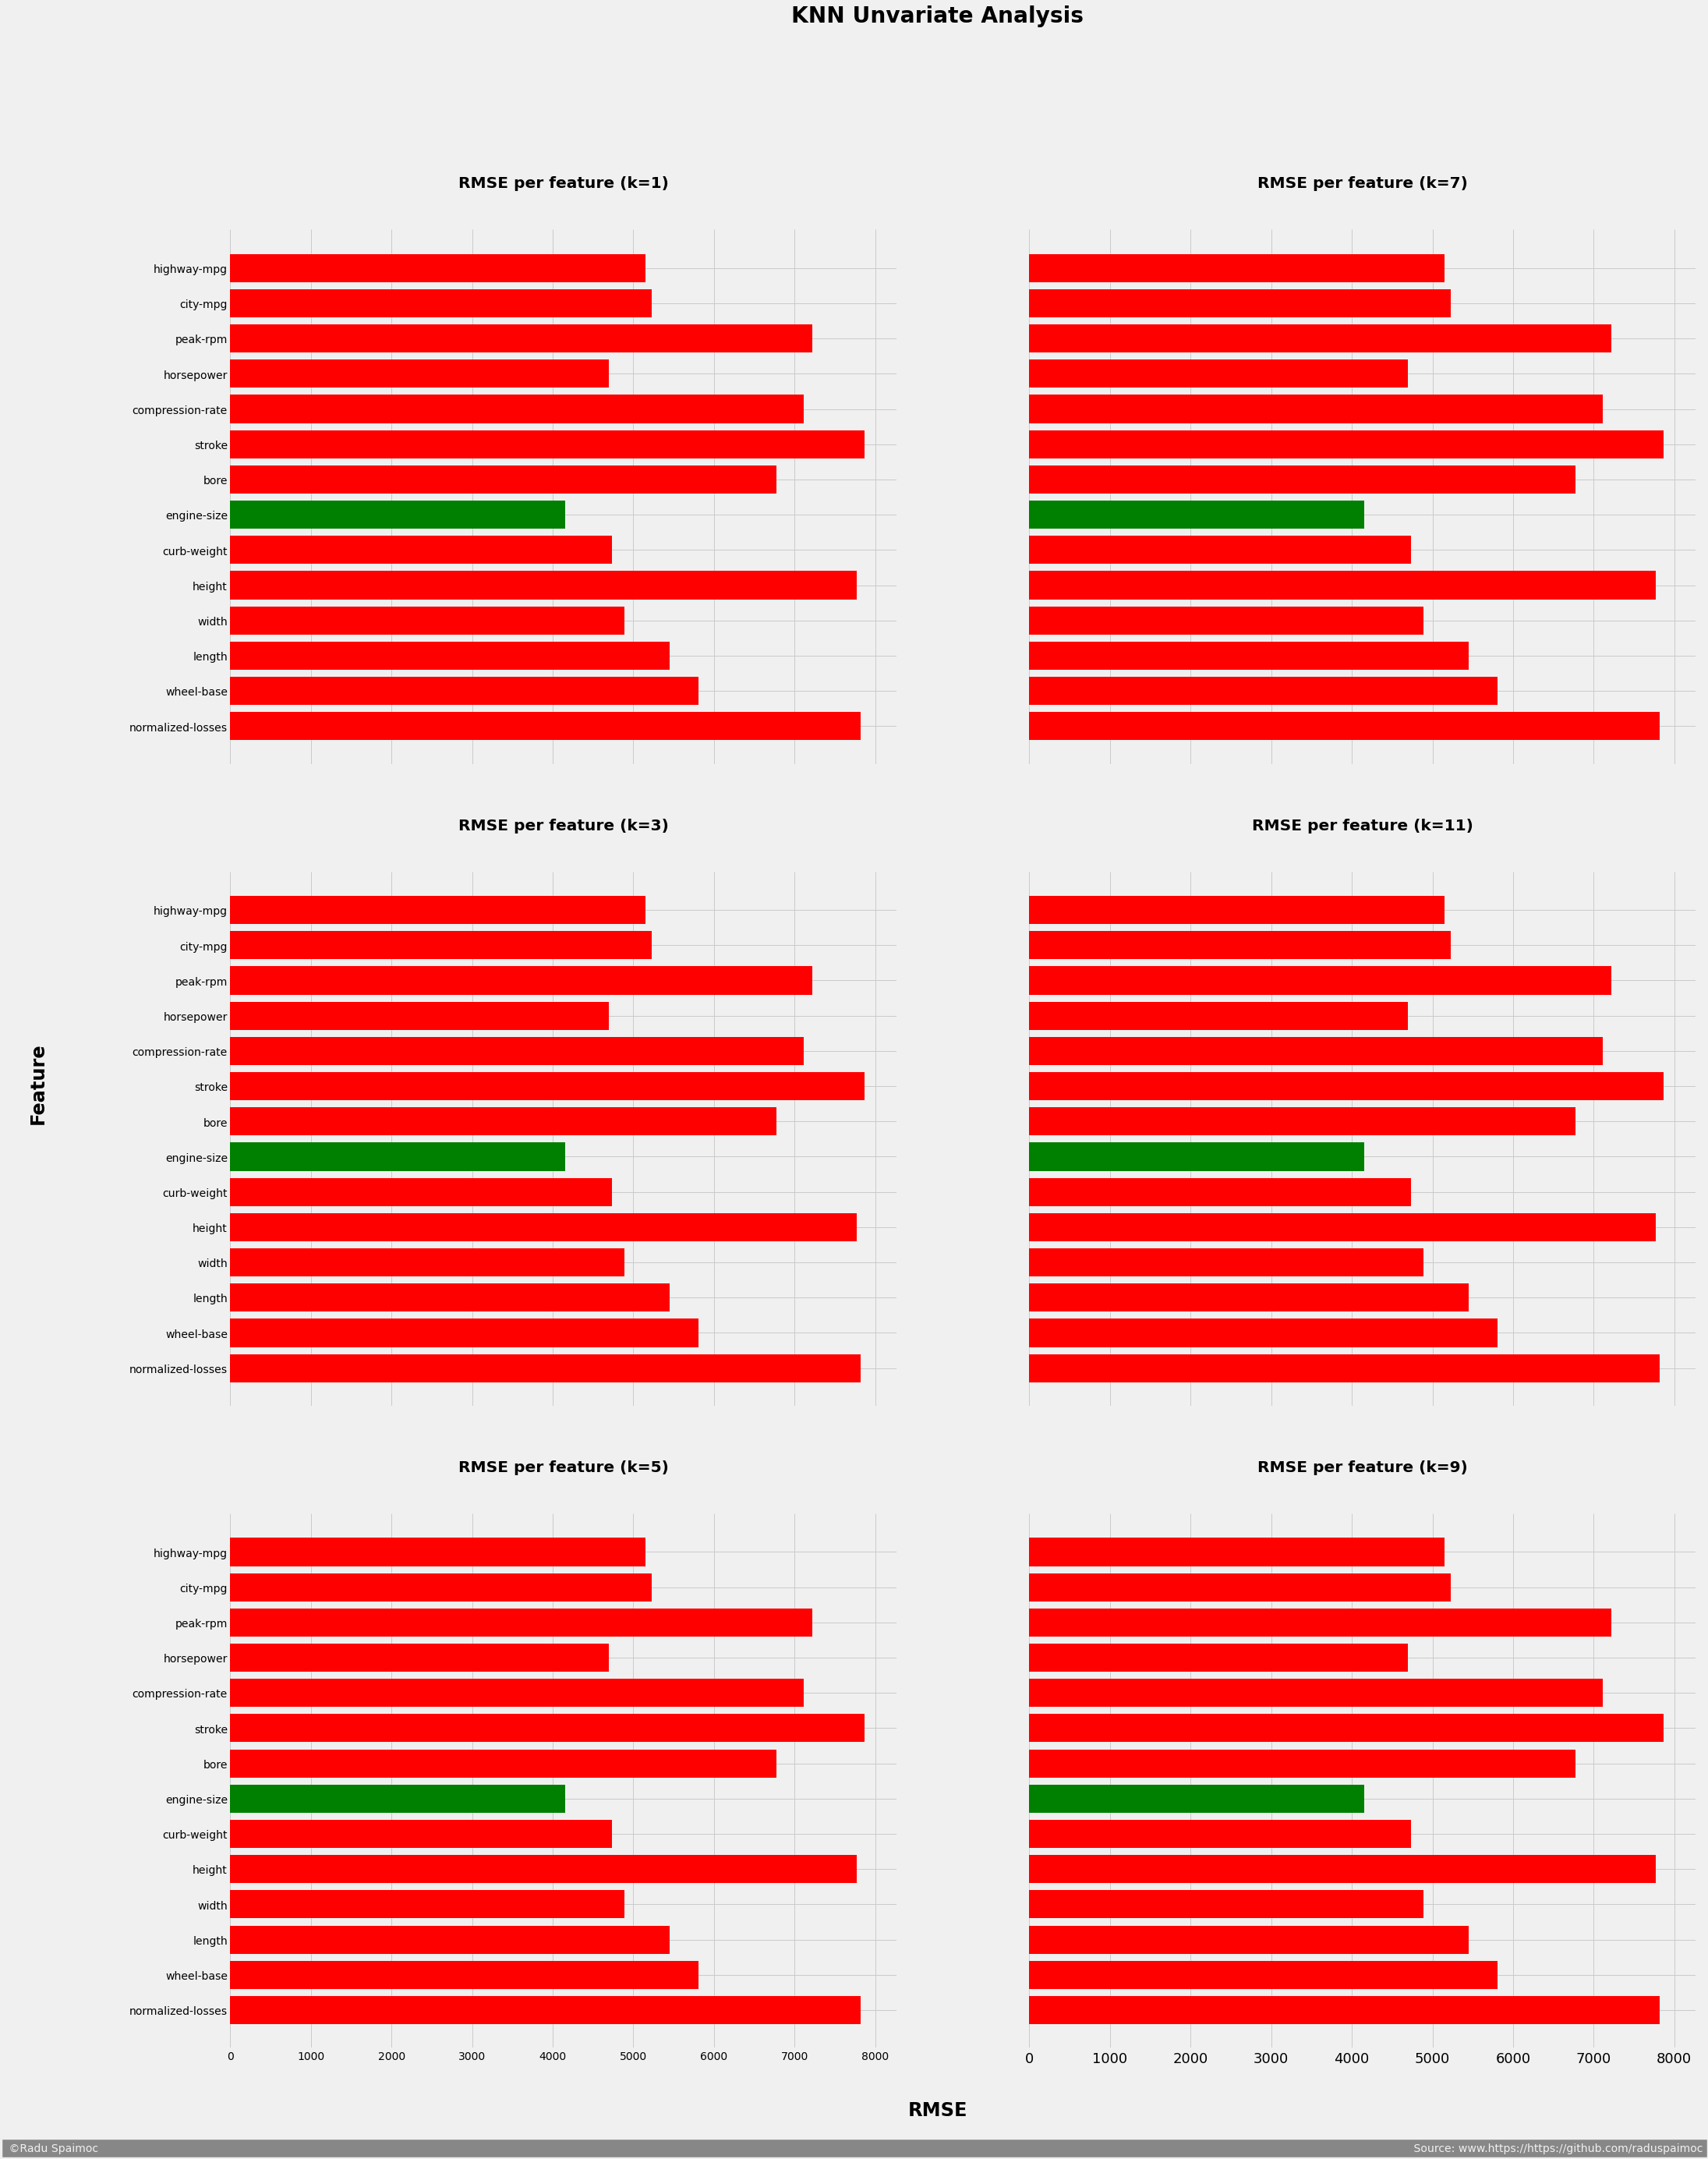

In [146]:
multiple_subplots(finale_rmses, "KNN Unvariate Analysis", "RMSE per feature", "RMSE", "Feature", sigbar_x=-12700.1, sigbar_y=-4)